# ASSIGNMENT - 6

---


**Question 1 ▶ Create portfolio for the given stocks:
Google, amazon and tesla for the last 10 years.**

In [94]:
#pip install --upgrade pandas-datareader

In [124]:
import numpy as np  
from pandas_datareader import data as dr 
import pandas as pd
import matplotlib.pyplot as plt

In [125]:
Google=pd.read_csv('/content/GOOG.csv')
Google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,297.126312,301.664276,297.126312,301.046600,301.046600,4748131
1,2011-01-04,301.679230,301.958191,298.939514,299.935760,299.935760,3662677
2,2011-01-05,298.914581,304.025452,298.904633,303.397797,303.397797,5083583
3,2011-01-06,304.199799,308.060303,303.885956,305.604523,305.604523,4131026
4,2011-01-07,306.805023,307.970642,303.925812,307.069031,307.069031,4218152


In [126]:
Amazon=pd.read_csv('/content/AMZN.csv')
Amazon.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,181.369995,186.000000,181.210007,184.220001,184.220001,5331400
1,2011-01-04,186.149994,187.699997,183.779999,185.009995,185.009995,5031800
2,2011-01-05,184.100006,187.449997,184.070007,187.419998,187.419998,3418800
3,2011-01-06,186.500000,187.410004,185.250000,185.860001,185.860001,3179700
4,2011-01-07,187.880005,188.449997,183.740005,185.490005,185.490005,5221700


In [127]:
Tesla=pd.read_csv('/content/TSLA.csv')
Tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,5.368,5.400,5.180,5.324,5.324,6415000
1,2011-01-04,5.332,5.390,5.204,5.334,5.334,5937000
2,2011-01-05,5.296,5.380,5.238,5.366,5.366,7233500
3,2011-01-06,5.366,5.600,5.362,5.576,5.576,10306000
4,2011-01-07,5.600,5.716,5.580,5.648,5.648,11239500


In [128]:
Google1=Google[Google.columns[5:6]]
Google1

,Adj Close
0,301.046600
1,299.935760
2,303.397797
3,305.604523
4,307.069031
...,...
2764,2961.280029
2765,2928.959961
2766,2930.090088
2767,2920.050049


In [129]:
Amazon1=Amazon[Amazon.columns[5:6]]

In [130]:
Tesla1=Tesla[Tesla.columns[4:5]]

**Normalize Prices**

Same as Cumulative Daily Returns

In [131]:
for stock_df in (Google,Amazon,Tesla):
    stock_df['Normed Return']=stock_df['Adj Close']/stock_df.iloc[0]['Adj Close']

In [132]:
for stock_df in (Google,Amazon,Tesla):
    stock_df.drop(columns=['Open','High','Low','Close','Volume'],inplace=True)

In [133]:
Amazon.head()

,Date,Adj Close,Normed Return
0,2011-01-03,184.220001,1.000000
1,2011-01-04,185.009995,1.004288
2,2011-01-05,187.419998,1.017371
3,2011-01-06,185.860001,1.008902
4,2011-01-07,185.490005,1.006894


In [134]:
Google.head()

,Date,Adj Close,Normed Return
0,2011-01-03,301.046600,1.000000
1,2011-01-04,299.935760,0.996310
2,2011-01-05,303.397797,1.007810
3,2011-01-06,305.604523,1.015140
4,2011-01-07,307.069031,1.020005


In [135]:
Tesla.head()

,Date,Adj Close,Normed Return
0,2011-01-03,5.324,1.000000
1,2011-01-04,5.334,1.001878
2,2011-01-05,5.366,1.007889
3,2011-01-06,5.576,1.047333
4,2011-01-07,5.648,1.060856


**Stock Allocations**

In [136]:
for stock_df,allo in zip([Google,Amazon,Tesla],[.3,.4,.3]):
    stock_df['Allocation']=stock_df['Normed Return']*allo

In [137]:
Google.head()

,Date,Adj Close,Normed Return,Allocation
0,2011-01-03,301.046600,1.000000,0.300000
1,2011-01-04,299.935760,0.996310,0.298893
2,2011-01-05,303.397797,1.007810,0.302343
3,2011-01-06,305.604523,1.015140,0.304542
4,2011-01-07,307.069031,1.020005,0.306001


In [138]:
for stock_df in (Google,Amazon,Tesla):
    stock_df['Position Values']=stock_df['Allocation']*1000000

In [139]:
Amazon.head()

,Date,Adj Close,Normed Return,Allocation,Position Values
0,2011-01-03,184.220001,1.000000,0.400000,400000.000000
1,2011-01-04,185.009995,1.004288,0.401715,401715.327317
2,2011-01-05,187.419998,1.017371,0.406948,406948.207540
3,2011-01-06,185.860001,1.008902,0.403561,403560.959703
4,2011-01-07,185.490005,1.006894,0.402758,402757.581138


**Total Portfolio Value**

In [140]:
portfolio_val=pd.concat([Google['Position Values'],Amazon['Position Values'],Tesla['Position Values']],axis=1)

In [141]:
portfolio_val.head()

,Position Values,Position Values,Position Values
0,300000.000000,400000.000000,300000.000000
1,298893.021878,401715.327317,300563.486101
2,302343.022974,406948.207540,302366.641623
3,304542.077207,403560.959703,314199.849737
4,306001.493789,402757.581138,318256.949662


In [142]:
portfolio_val.columns=['Google','Amazon','Tesla']

In [143]:
portfolio_val['Total Pos']=portfolio_val.sum(axis=1)

In [144]:
portfolio_val.head()

,Google,Amazon,Tesla,Total Pos
0,300000.000000,400000.000000,300000.000000,1.000000e+06
1,298893.021878,401715.327317,300563.486101,1.001172e+06
2,302343.022974,406948.207540,302366.641623,1.011658e+06
3,304542.077207,403560.959703,314199.849737,1.022303e+06
4,306001.493789,402757.581138,318256.949662,1.027016e+06


Text(0.5, 1.0, 'Total Portfolio Value')

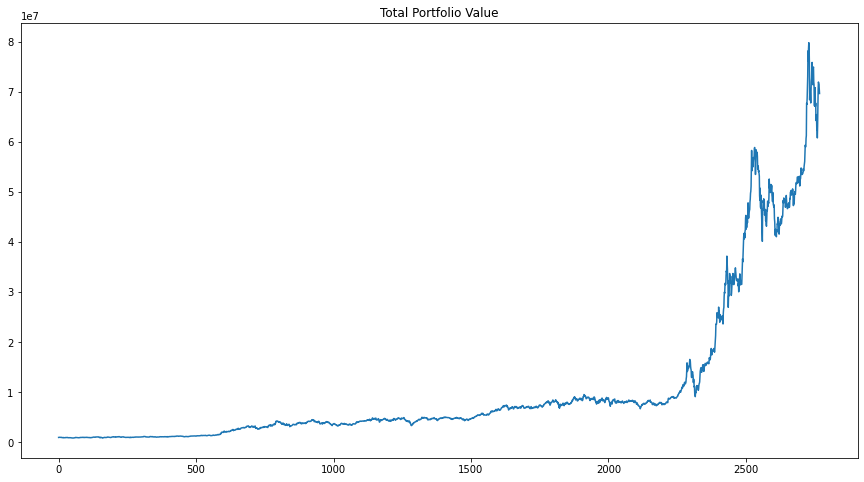

In [80]:
portfolio_val['Total Pos'].plot(figsize=(15,8))
plt.title('Total Portfolio Value')

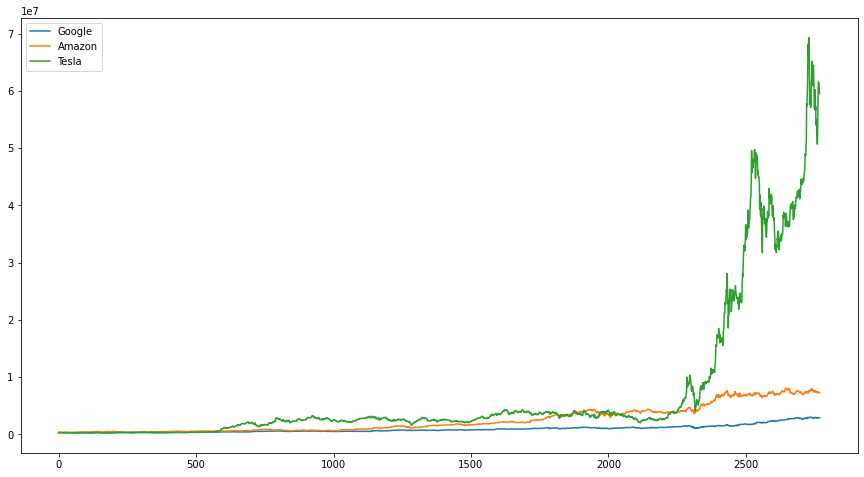

In [81]:
portfolio_val.drop('Total Pos',axis=1).plot(figsize=(15,8),kind='line')

**Question 2 ▶ Visualize the expected returns on the  10 years series.** 

Text(0.5, 1.0, 'Expected Return')

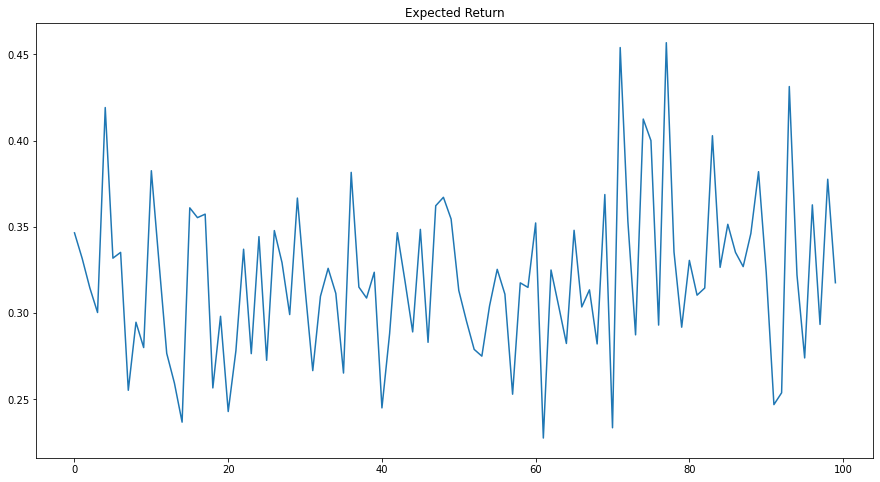

In [180]:
df['Expected Return'].plot(figsize=(15,8))
plt.title('Expected Return')

**Question 3 ▶ Evaluate the annual daily mean, correlation,
Sharpe ratio and daily standard mean.**

In [ ]:
portfolio_val['Total Pos'].pct_change(1)

0            NaN
1       0.001172
2       0.010474
3       0.010522
4       0.004610
          ...   
2764    0.020935
2765   -0.004132
2766   -0.002662
2767   -0.012974
2768   -0.012391
Name: Total Pos, Length: 2769, dtype: float64

In [ ]:
portfolio_val['Daily Returns']=portfolio_val['Total Pos'].pct_change(1)
portfolio_val

,Google,Amazon,Tesla,Total Pos,Daily Returns
0,3.000000e+05,4.000000e+05,3.000000e+05,1.000000e+06,NaN
1,2.988930e+05,4.017153e+05,3.005635e+05,1.001172e+06,0.001172
2,3.023430e+05,4.069482e+05,3.023666e+05,1.011658e+06,0.010474
3,3.045421e+05,4.035610e+05,3.141998e+05,1.022303e+06,0.010522
4,3.060015e+05,4.027576e+05,3.182569e+05,1.027016e+06,0.004610
...,...,...,...,...,...
2764,2.950985e+06,7.368125e+06,6.164200e+07,7.196110e+07,0.020935
2765,2.918777e+06,7.411182e+06,6.133377e+07,7.166373e+07,-0.004132
2766,2.919904e+06,7.347780e+06,6.120529e+07,7.147298e+07,-0.002662
2767,2.909898e+06,7.323613e+06,6.031217e+07,7.054568e+07,-0.012974


**Portfolio Statistics**

**Sharpe Ratio**

In [ ]:
SR=portfolio_val['Daily Returns'].mean()/portfolio_val['Daily Returns'].std()
SR

0.07825744409429032

In [ ]:
ASR=(252**0.5)*SR
ASR

1.2422984118781952

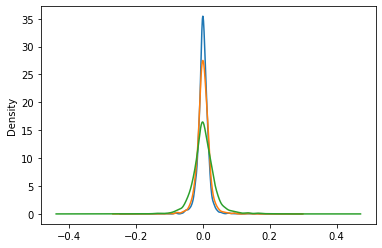

In [ ]:
Google['Adj Close'].pct_change(1).plot(kind='kde')
Amazon['Adj Close'].pct_change(1).plot(kind='kde')
Tesla['Adj Close'].pct_change(1).plot(kind='kde')


**Correlation**

In [199]:
#To obtain annual covariance between Google, Amazon and Tesla
logReturns.cov() * 250 

,Adj Close,Adj Close,Adj Close
Adj Close,0.064673,0.045103,0.045659
Adj Close,0.045103,0.094915,0.055524
Adj Close,0.045659,0.055524,0.300052


In [200]:
stock_data.corr()

,Adj Close,Adj Close,Adj Close
Adj Close,1.000000,0.948522,0.887496
Adj Close,0.948522,1.000000,0.823236
Adj Close,0.887496,0.823236,1.000000


**Calculating expected return of portfolio**

In [201]:
# Dynamically generating weights code
numberOfStocks = len(stocks)
numberOfStocks

3

In [202]:
#random weights
weights = np.random.random(numberOfStocks)

In [203]:
weights = weights1/np.sum(weights1)#rebalance
weights

array([0.25595822, 0.56656839, 0.17747339])

**Calculating expected return of portfolio**

In [204]:
(weights * logReturns.mean()).sum() * 250

0.2853074450324203

**Expected standard deviance or volatility**

In [ ]:
np.sqrt(np.dot(weights.T, np.dot(logReturns.cov() * 250, weights)))

0.2693533417718994

In [161]:
logReturns = np.log(stock_data/stock_data.shift(1))
logReturns

,Adj Close,Adj Close,Adj Close
0,NaN,NaN,NaN
1,-0.003697,0.004279,0.001877
2,0.011476,0.012942,0.005981
3,0.007247,-0.008358,0.038389
4,0.004781,-0.001993,0.012830
...,...,...,...
2764,0.006243,-0.008212,0.024935
2765,-0.010974,0.005827,-0.005013
2766,0.000386,-0.008592,-0.002097
2767,-0.003432,-0.003294,-0.014700


In [162]:
#To obtain annual average returns!
logReturns.mean() * 250 

Adj Close    0.204388
Adj Close    0.261552
Adj Close    0.477850
dtype: float64

In [163]:
# Dynamically generating weights code
numberOfStocks = len(stocks)
numberOfStocks

3

In [164]:
#random weights
weights1 = np.random.random(numberOfStocks)

In [165]:
weights = weights1/np.sum(weights1)#rebalance
weights

array([0.25595822, 0.56656839, 0.17747339])

 **Question 4 ▶ Formulate the Markowitz frontier.**

Our main target is to get optimal weight combination where we get optimal return and optimal standard deviation.


In [181]:
expectedReturn = []
standardDeviation = []
weightList0 = []
weightList1 = []
weightList2 = []

# Running simulations for finding optimum weights
for i in range(100):
    weights = np.random.random(numberOfStocks)
    weights = weights/ weights.sum()
    weightList0.append(weights[0])
    weightList1.append(weights[1])
    weightList2.append(weights[2])
    expectedReturn.append((weights * logReturns.mean()).sum() * 250)
    standardDeviation.append(np.sqrt(np.dot(weights.T, np.dot(logReturns.cov() * 250, weights))))

#Converting lists into arrays
weightList0 = np.array(weightList0) #Weights for Google
weightList1 = np.array(weightList1) #Weights for Amazon
weightList1 = np.array(weightList2) #Weights for Tesla
expectedReturn = np.array(expectedReturn) 
standardDeviation = np.array(standardDeviation)

#Creating dataframe
df = pd.DataFrame({"Weight of Google": weightList0, "Weight of Amazon": weightList1, "Weight of Tesla": weightList2, "Expected Return": expectedReturn, "Standard deviation": standardDeviation})
df.head()

,Weight of Google,Weight of Amazon,Weight of Tesla,Expected Return,Standard deviation
0,0.420972,0.196214,0.196214,0.279928,0.259507
1,0.306257,0.048972,0.048972,0.254638,0.262551
2,0.677002,0.001523,0.001523,0.223182,0.243377
3,0.362961,0.525906,0.525906,0.354556,0.346757
4,0.540402,0.102214,0.102214,0.252769,0.246306


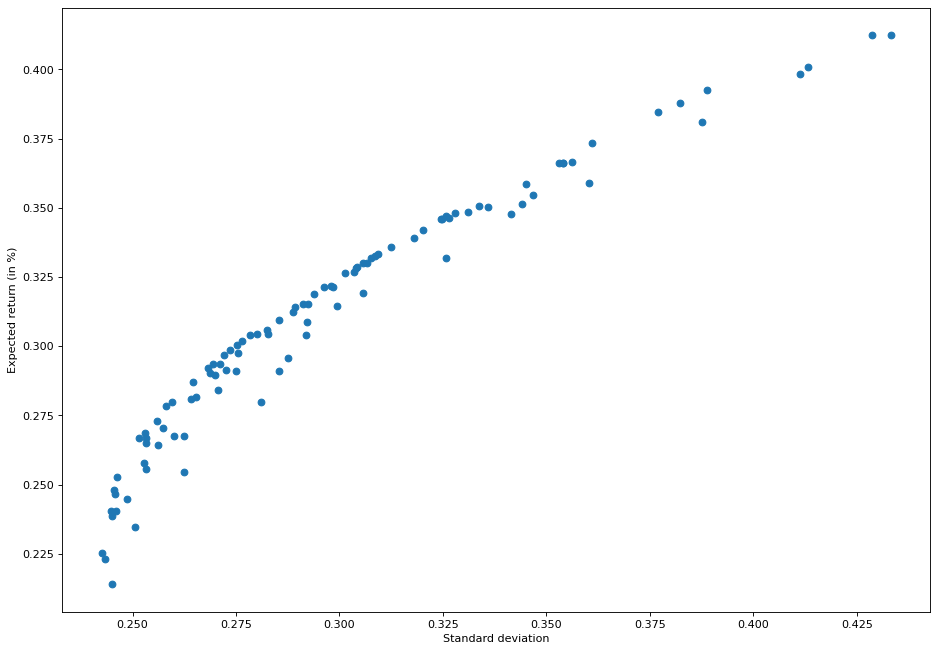

In [182]:
plt.figure(figsize=(14, 10), dpi=80)
plt.scatter(df["Standard deviation"], df["Expected Return"])
plt.xlabel("Standard deviation")
plt.ylabel("Expected return (in %)")
plt.show()

**Question 5 ▶ Discuss on the optimal portfolio and the
different parameters evaluated for the
portfolio.**

**The above given Standard Deviation Versus Gaph is Known as the Efficient Frontier Graph it plots the expected return on a portfolio of investments on the y-axis and its risk as measured by its standard deviation on the x-axis.**

◼ The efficient frontier plots portfolios that yields the same risk-return tradeoff.

The **Efficient Frontier Graph** plays a very important role in finding the optimal parameters evaluated for the portfolio.

For finding the Most Optimum Portfolio we need : 
 * Mean of the expected return
 * Median of the expected return

The Optimal Portfolio is the one who's expected return is either approximately equal to mean of the expected return or approximately equal to the median.

On the basis of these criteria, corresponding weights values are selected.And that particular Portfolio is called the **Efficient (Optimal) Portfolio** for the investment.

In [184]:
df[(df["Expected Return"]>0.225) & (df["Expected Return"]< 0.250)].sort_values(by=['Expected Return'])


,Weight of Google,Weight of Amazon,Weight of Tesla,Expected Return,Standard deviation
62,0.722825,0.023622,0.023622,0.225342,0.242521
19,0.483192,0.004148,0.004148,0.234828,0.250629
5,0.554850,0.041032,0.041032,0.238710,0.245077
93,0.559103,0.050068,0.050068,0.240421,0.244760
67,0.532571,0.044189,0.044189,0.240666,0.245948
70,0.476825,0.048499,0.048499,0.244785,0.248759
30,0.532865,0.071267,0.071267,0.246506,0.245746
55,0.539877,0.081044,0.081044,0.248220,0.245619


In [185]:
df[(df["Expected Return"]>0.250)].sort_values(by=['Expected Return']).head(10)


,Weight of Google,Weight of Amazon,Weight of Tesla,Expected Return,Standard deviation
4,0.540402,0.102214,0.102214,0.252769,0.246306
1,0.306257,0.048972,0.048972,0.254638,0.262551
38,0.402496,0.079357,0.079357,0.255708,0.253268
42,0.408382,0.091334,0.091334,0.257962,0.252892
71,0.367491,0.110176,0.110176,0.264375,0.256272
99,0.635674,0.184920,0.184920,0.265212,0.253287
37,0.531703,0.164527,0.164527,0.266745,0.251540
44,0.607549,0.184972,0.184972,0.266831,0.253217
78,0.709915,0.215198,0.215198,0.267518,0.259919
59,0.737199,0.223164,0.223164,0.267681,0.262453


In [186]:
df["Expected Return"].mean()

0.3107883971853581

In [187]:
df["Expected Return"].sort_values().median()

0.30906545767557936

In [196]:
df[(df["Expected Return"]>0.300)].sort_values(by=['Expected Return'])


,Weight of Google,Weight of Amazon,Weight of Tesla,Expected Return,Standard deviation
86,0.345878,0.271452,0.271452,0.300495,0.275308
40,0.350931,0.279082,0.279082,0.301856,0.276496
25,0.362635,0.291822,0.291822,0.303943,0.278487
22,0.076907,0.216649,0.216649,0.304016,0.291982
24,0.479138,0.324968,0.324968,0.304453,0.282721
76,0.260738,0.267738,0.267738,0.304558,0.280166
64,0.230010,0.266517,0.266517,0.306051,0.282382
89,0.538339,0.359974,0.359974,0.308640,0.292070
74,0.218477,0.279373,0.279373,0.309491,0.285461
53,0.413233,0.343473,0.343473,0.312223,0.288739


In [198]:
df.loc[10]

Weight of Google      0.298170
Weight of Amazon      0.227583
Weight of Tesla       0.227583
Expected Return       0.293733
Standard deviation    0.271249
Name: 10, dtype: float64

* Portfolio performance measures are a key factor in the investment decision. 

* These provide the necessary information for investors to assess how effectively their money has been invested (or may be invested). 

* In the Market there is always risk situated with the returns and as the returns increases the risk also increases.

* Our main target is to get optimal weight combination where we get optimal return and optimal standard deviation.

* If the Investors are not willing to take the risk they can stop between the point 0.250 t0 0.275 in the Efficient Frontier Graph, where there will be minimal loss and normal returns.

* If Investors are willing to take the risk then they can go for the higher vale in the Efficient Frontier Graph but as the returns goes up the, the risk also increases.



---

